<a href="https://colab.research.google.com/github/FadhilZidan/MachineLearning/blob/main/BikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Landasan Teori

---



Pengertian Analisis Data dan Perannya Analisis data adalah proses inspeksi, pembersihan, transformasi, dan pemodelan data dengan tujuan menemukan informasi yang berguna, menarik kesimpulan, dan mendukung pengambilan keputusan. Dalam konteks bisnis, analisis data memungkinkan pengambilan keputusan berbasis bukti (data-driven decision making), bukan hanya berdasarkan intuisi, sehingga dapat meminimalkan risiko dan meningkatkan efisiensi.

Perbedaan Descriptive Analysis dan Exploratory Data Analysis (EDA)

Descriptive Analysis: Berfokus pada ringkasan statistik dari data historis (misalnya: rata-rata, median, standar deviasi) untuk menjawab "Apa yang telah terjadi?".

Exploratory Data Analysis (EDA): Merupakan pendekatan analisis yang lebih mendalam untuk menemukan pola, anomali, atau hubungan antar variabel yang tidak terlihat secara langsung. EDA sering menggunakan visualisasi untuk merumuskan hipotesis baru.

Pentingnya Data Cleaning dan Data Wrangling Data mentah seringkali memiliki nilai yang hilang (missing values), duplikat, atau format yang tidak konsisten. Data cleaning memastikan kualitas data terjaga, sementara data wrangling mengubah format data mentah menjadi format yang siap dianalisis. Tanpa tahap ini, hasil analisis akan bias atau tidak akurat (Garbage In, Garbage Out).

Peran Visualisasi Data Visualisasi data berfungsi untuk menyederhanakan data yang kompleks menjadi bentuk grafis yang mudah dipahami. Ini membantu pemangku kepentingan untuk menangkap tren, perbandingan, dan outlier dengan cepat, sehingga insight dapat dikomunikasikan secara lebih efektif.

Teknik Machine Learning yang Digunakan Dalam proyek ini, digunakan Linear Regression.

Alasan: Dataset memiliki target numerik kontinu (cnt - jumlah total penyewa). Linear Regression digunakan untuk memahami pengaruh variabel cuaca dan musim terhadap jumlah penyewaan serta memberikan model prediksi dasar yang mudah diinterpretasikan.

#2. Implementasi Proyek

---



## a. Data Preparation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

print(day_df.isnull().sum())
print(f"Duplikat: {day_df.duplicated().sum()}")

day_df['season_label'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['weather_label'] = day_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplikat: 0


## b. Exploratory Data Analysis (EDA)


---


Pertanyaan Bisnis:

Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda harian?

Bagaimana pola penyewaan sepeda berdasarkan jam pada hari kerja vs hari libur?

In [ ]:
print(day_df.describe())

correlation = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
print(correlation['cnt'])

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

## c. Visualisasi Data

/tmp/ipython-input-473831178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_label', y='cnt', data=day_df, palette='viridis')


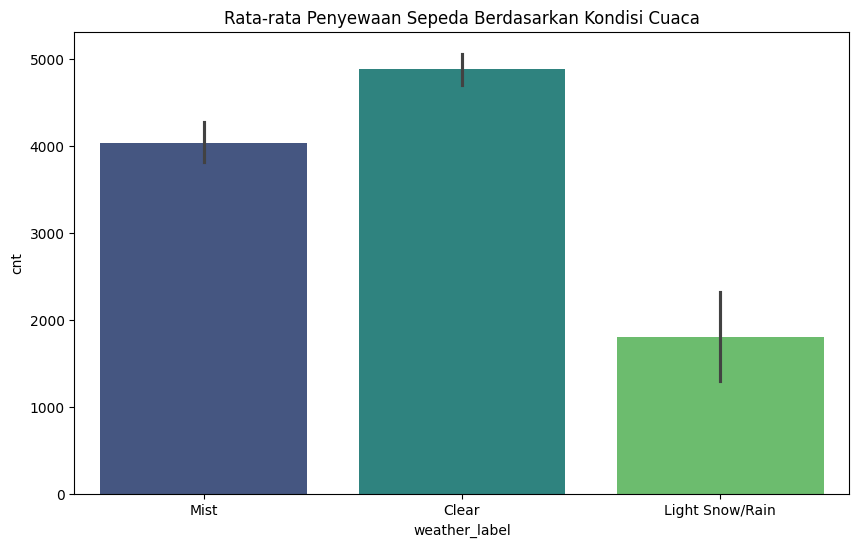

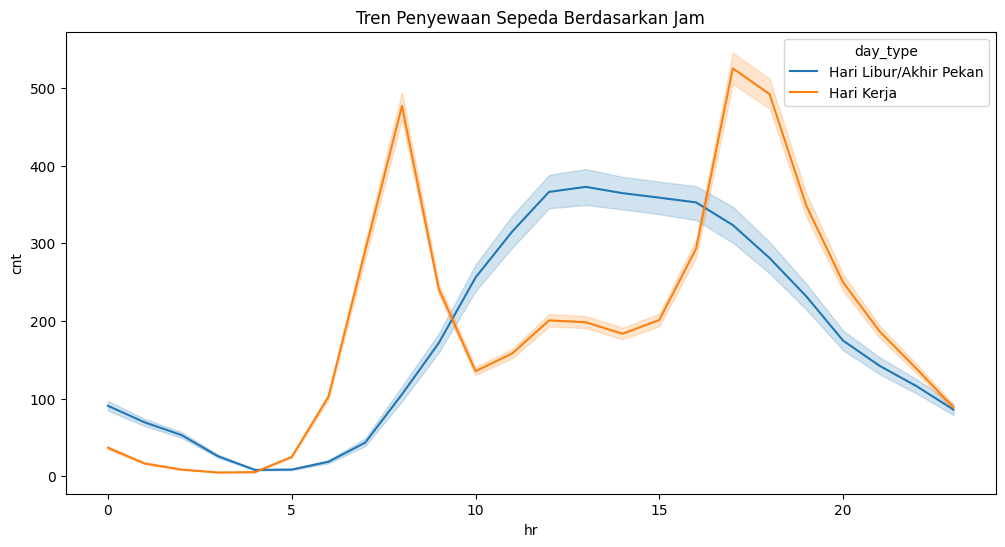

In [ ]:
# Visualisasi 1: Cuaca vs Penyewaan
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_label', y='cnt', data=day_df, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.savefig('weather_impact.png')

# Visualisasi 2: Tren Jam (Hari Kerja vs Libur)
hour_df['day_type'] = hour_df['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Hari Libur/Akhir Pekan')
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='day_type', data=hour_df)
plt.title('Tren Penyewaan Sepeda Berdasarkan Jam')
plt.savefig('hourly_trend.png')

## d. Machine Learning (Linear Regression)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features = ['temp', 'hum', 'windspeed', 'season', 'weathersit']
X = day_df[features]
y = day_df['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print(f"R-squared Score: {model.score(X_test, y_test):.2f}")

R-squared Score: 0.54


## e. Insight & Kesimpulan


---


Insight 1: Cuaca cerah mendominasi jumlah penyewaan tertinggi. Penurunan drastis terjadi saat hujan salju/hujan ringan.

Insight 2: Pada hari kerja, terdapat lonjakan penyewaan pada jam sibuk (08:00 dan 17:00), menunjukkan sepeda digunakan untuk komuter. Pada hari libur, penggunaan meningkat stabil di siang hari untuk rekreasi.

Insight 3: Suhu (temp) memiliki korelasi positif yang kuat dengan jumlah penyewaan. Semakin hangat suhu (sampai batas tertentu), semakin banyak orang yang menyewa sepeda.